In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('./popculture-imdb-5000-movie-dataset/data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
df.color = df.color.apply(lambda color: 'Color' if color == 'NaN' or color != color else color)
clamp_zero = (lambda value: value if value > 0 else 0)
df.duration = df.duration.apply(clamp_zero)
df.num_critic_for_reviews = df.num_critic_for_reviews.apply(clamp_zero)
df.director_facebook_likes = df.director_facebook_likes.apply(clamp_zero)
df.actor_3_facebook_likes = df.actor_3_facebook_likes.apply(clamp_zero)
df.actor_2_facebook_likes = df.actor_2_facebook_likes.apply(clamp_zero)
df.actor_1_facebook_likes = df.actor_1_facebook_likes.apply(clamp_zero)
df.gross = df.gross.apply(clamp_zero)
df.imdb_score = df.imdb_score.apply(clamp_zero)
df.num_user_for_reviews = df.num_user_for_reviews.apply(clamp_zero)
nan_to_zero = (lambda value: 0 if value != value else value)
df.budget = df.budget.apply(nan_to_zero)
df.gross = df.gross.apply(nan_to_zero)
df['profit'] = df.gross - df.budget

# What's the probability that a movie was longer than an hour and a half? Two hours?

In [3]:
df.duration[df.duration >= 90].count() / df.duration.count()

0.8399762046400951

In [4]:
df.duration[df.duration >= 120].count() / df.duration.count()

0.22704739242514377

# What's the probability that a movie was directed by Stephen Spielberg?

In [5]:
df.director_name[df.director_name == 'Steven Spielberg'].count() / df.director_name.count()

0.005264223527029763

# What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [6]:
eastwood_direction = df[['director_name', 'profit']][df.director_name == 'Clint Eastwood']
eastwood_direction[df.profit >= 0]['profit'].count() / eastwood_direction['director_name'].count()

0.6

# What's the probability that a movie generally grossed more than its budget?

In [7]:
df.profit[df.profit >= 0].count() / df.profit.count()

0.50426333531628

# What's the probability that a movie grossed over the average gross of this data set?

In [8]:
df.gross[df.gross > np.average(df.gross)].count() / df.gross.count()

0.305968669442792

# In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?
- For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross < budget).

In [9]:
movies_to_see = df[df.imdb_score >= 6]
false_positives = movies_to_see[movies_to_see.profit < 0]
movies_not_to_see = df[df.imdb_score < 6]
false_negatives = movies_not_to_see[movies_not_to_see.profit >= 0]

In [17]:
false_negatives.sort_values('imdb_score', ascending=False)[['movie_title', 'title_year']].head()

,movie_title,title_year
2602,3 Men and a Baby,1987.0
3646,Don McKay,2009.0
2783,Poetic Justice,1993.0
2820,Teenage Mutant Ninja Turtles,2014.0
2846,The New Guy,2002.0


In [16]:
false_positives.sort_values('imdb_score')[['movie_title', 'title_year']].head()

,movie_title,title_year
3954,Another Happy Day,2011.0
499,The Postman,1997.0
4542,Godzilla 2000,1999.0
1494,Punisher: War Zone,2008.0
1535,Pushing Tin,1999.0


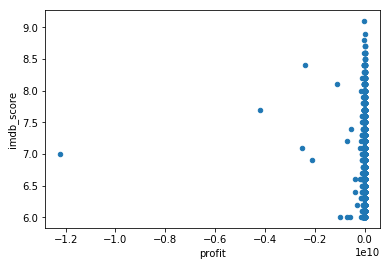

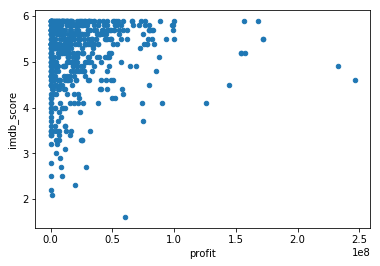

In [12]:
false_positives.plot(x='profit', y='imdb_score', kind='scatter')
false_negatives.plot(x='profit', y='imdb_score', kind='scatter')

# If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

# Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

# What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

# How does the distribution of movie budgets compare to the movie gross values?

# Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

# Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

# Have any years grossed a statistically-significant higher amount than the other years?